You are using the default legacy behaviour of the <class 'transformers.models.llama.tokenization_llama_fast.LlamaTokenizerFast'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565 - if you loaded a llama tokenizer from a GGUF file you can ignore this message.


Converting chunk 1/2 in test.txt
Converting chunk 2/2 in test.txt
Converting chunk 1/1 in test2.txt
Added embedding to Mark.
Added embedding to Ava.
Added embedding to TechGiant.
Added embedding to Sarah Bennett.
Added embedding to Sarah.
Added embedding to TechGiant Corp.
Added embedding to Mr. Rowan.
Added embedding to Alex.


c:\Users\xindi\AppData\Local\Programs\Python\Python312\Lib\site-packages\networkx\readwrite\json_graph\node_link.py:142: FutureWarning: 
The default value will be `edges="edges" in NetworkX 3.6.

To make this warning go away, explicitly set the edges kwarg, e.g.:

  nx.node_link_data(G, edges="links") to preserve current behavior, or
  nx.node_link_data(G, edges="edges") for forward compatibility.
  warnings.warn(


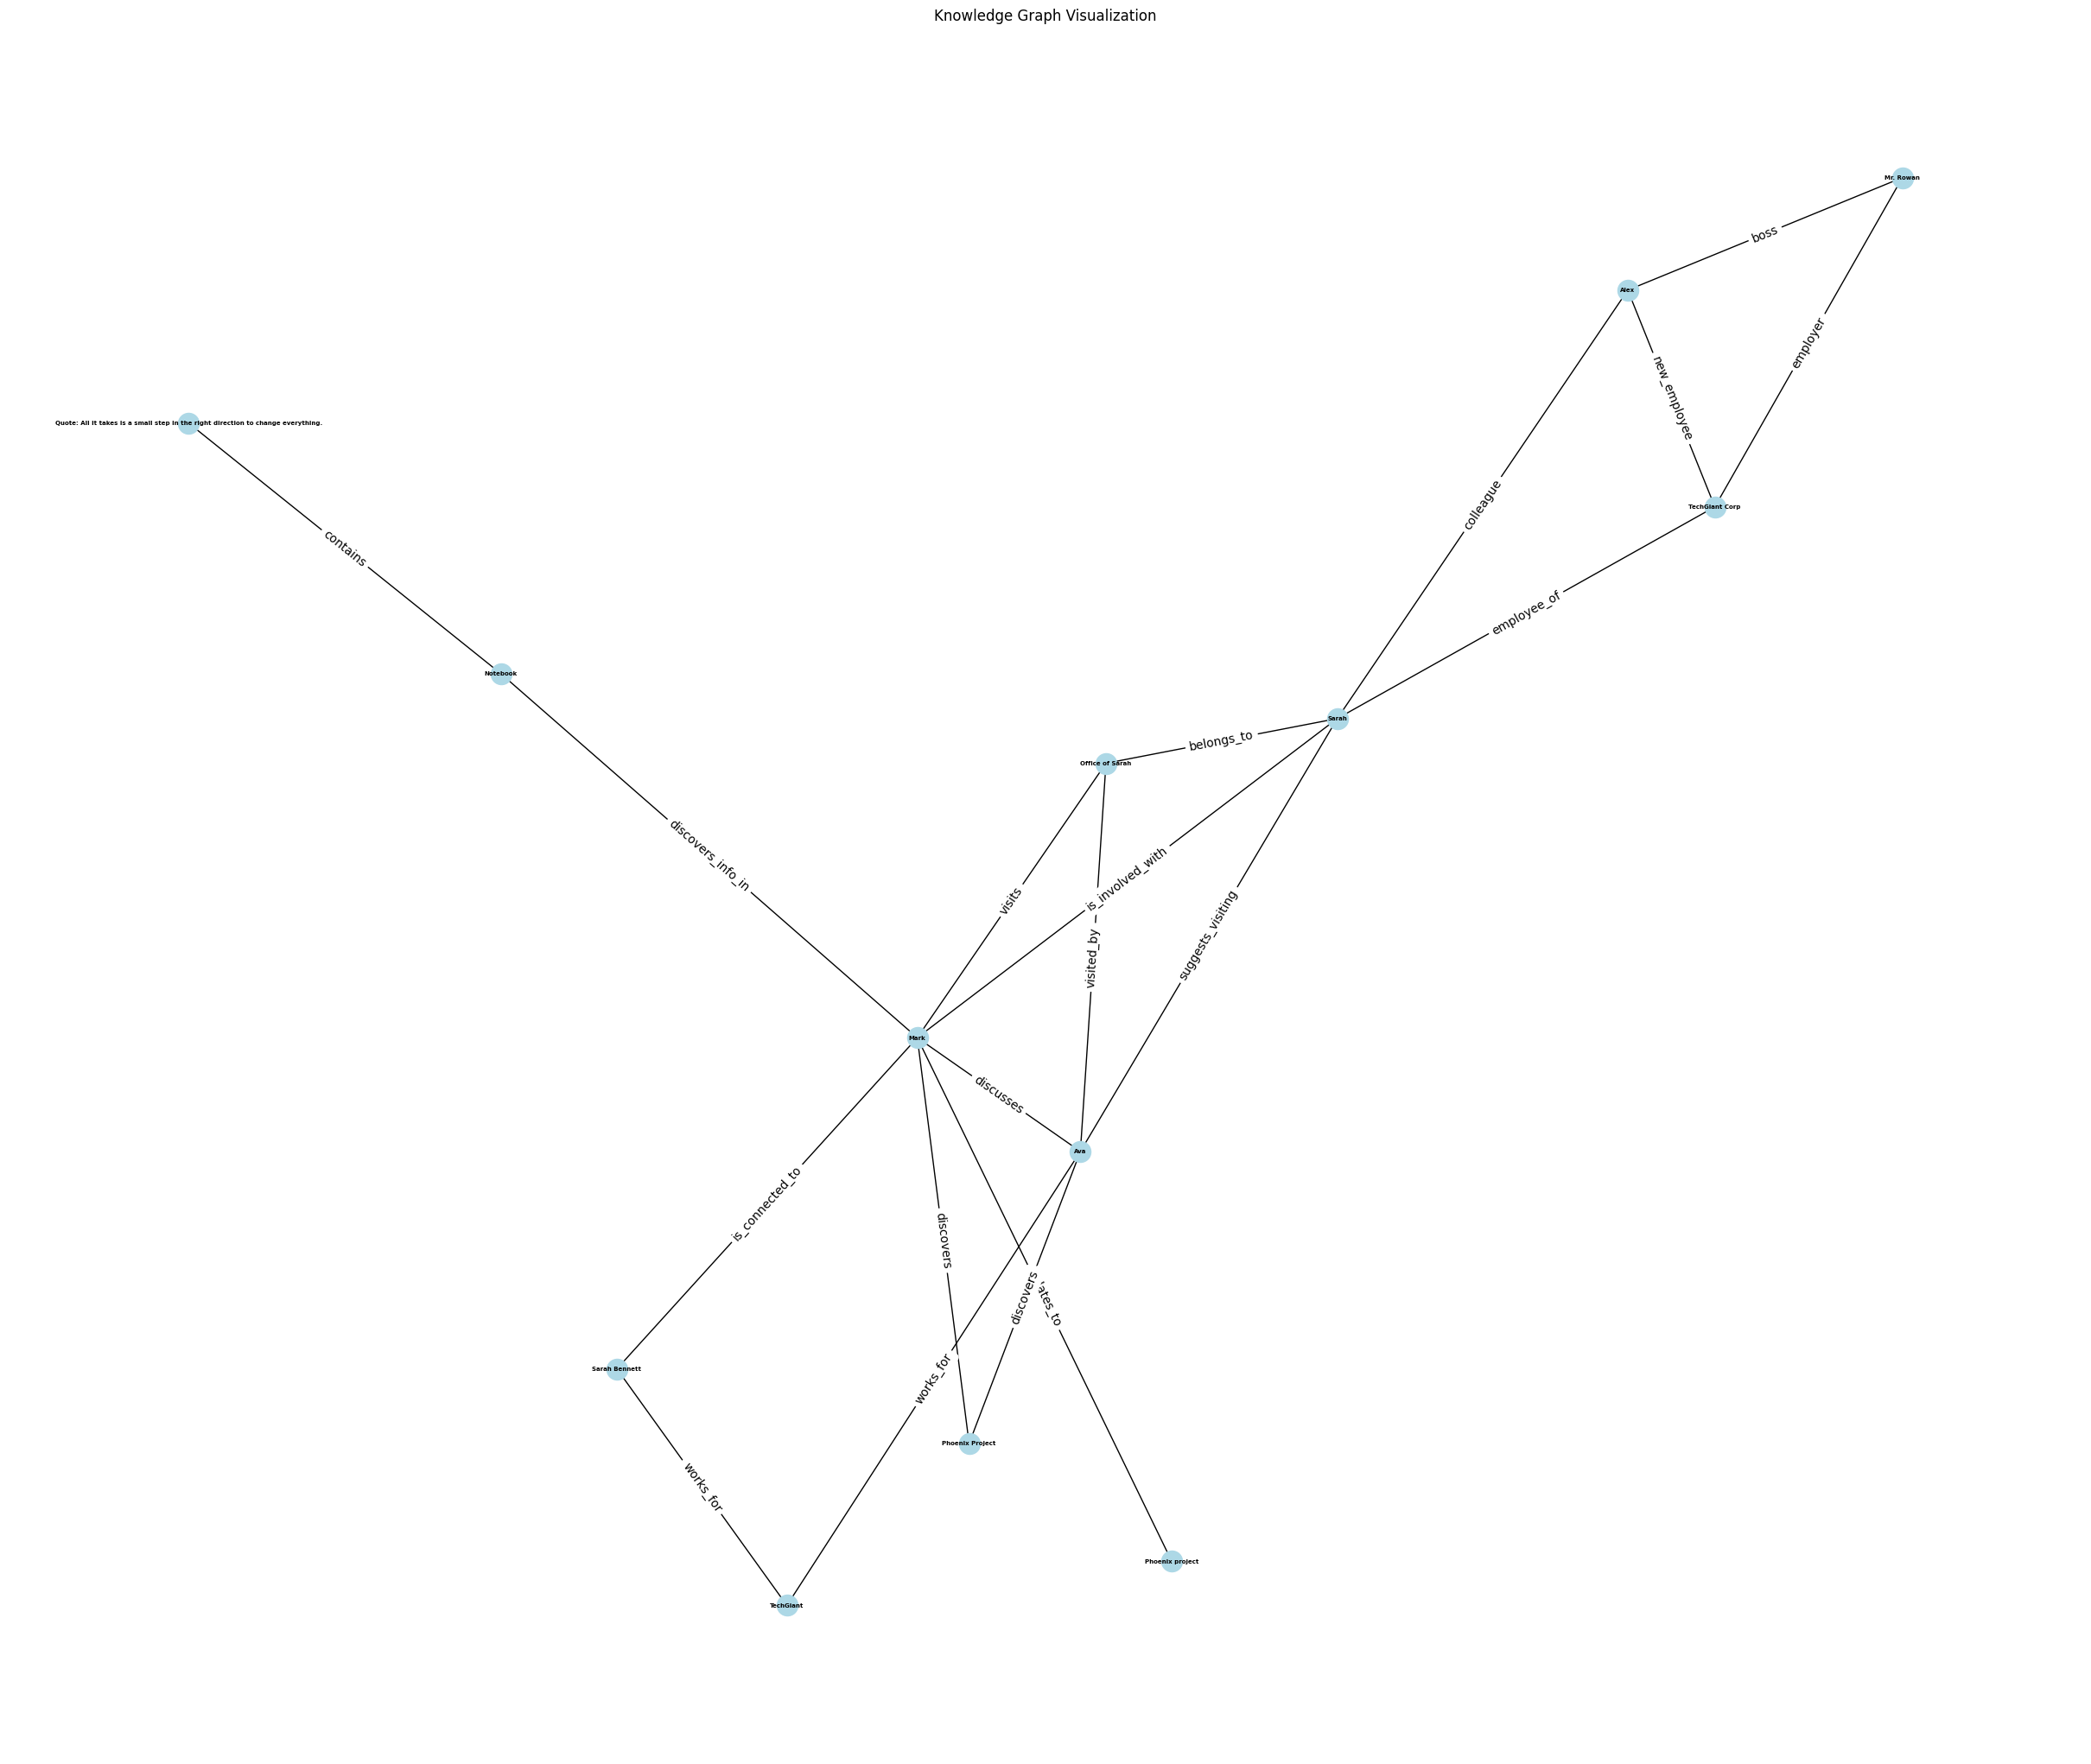

In [ ]:
from kg_builder import docs_to_kg
import json
import os
import networkx as nx
import pickle

import matplotlib.pyplot as plt


# YOU CAN CHANGE THESE
##################################################

# This is an array of all documents you want to be put into the graph
# Works with .txt, .pdf, and .json of the format [{"image": <image name>, "description":<text description of image>}]
txt_file_paths = ["test.txt", "test2.txt"]

# This is the file you want the graph to be saved to
graph_file = "Test.json"

# This is the file where the chunked documents will be stored
pickle_file = "Test.pkl"

# # This is the file where your ChatGPT apikey is stored, is should be of the form "sk-scvacct-XXXXXXXXXXXXXXX"
# apikey_file = "../serviceaccount.apikey"
# ##################################################

# # Open API key
# file = open(apikey_file, 'r')
# apikey = file.read().strip()
# file.close()
# # os.environ["OPENAI_API_KEY"] = apikey
# set_api_key(apikey)


# Create Graph
G, chunks = docs_to_kg(txt_file_paths, graph_file, pickle_file)

nx.node_link_data(G, edges="edges")
# Visualize the graph
plt.figure(figsize=(24, 20))
pos = nx.spring_layout(G, k=0.5, iterations=100)
nx.draw(G, pos, with_labels=True, node_color='lightblue', font_weight='bold', node_size=300, font_size=5)

# Write the relationships between nodes, gets ugly fast with large KGs
edge_labels = nx.get_edge_attributes(G, 'type')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)


plt.title("Knowledge Graph Visualization")
plt.show()

In [2]:
from kg_builder import reasoning, KG_RAG, gpt_call
import json
import os
import networkx as nx
import pickle
from kg_builder import docs_to_kg


# YOU CAN CHANGE THESE
##################################################

# This is the question you want to ask ChatGPT
query = "What does Mark do?" # simple queries may not have very good explainations as they are usually just lookups in the text

# This is the file you want the graph to be saved to
graph_file = "Test.json"

# This is the file where the chunked documents will be stored
pickle_file = "Test.pkl"

# # This is the file where your ChatGPT apikey is stored, is should be of the form "sk-scvacct-XXXXXXXXXXXXXXX"
# apikey_file = "../serviceaccount.apikey"
# ##################################################


# # Open API key
# file = open(apikey_file, 'r')
# apikey = file.read().strip()
# file.close()
# os.environ["OPENAI_API_KEY"] = apikey


# Open the 
with open(graph_file, 'r') as f:
    graph_data = json.load(f)
        
G = nx.node_link_graph(graph_data)

with open(pickle_file, 'rb') as file:
    chunks = pickle.load(file)

# Outputs all documents used from the most similar nodes
# Occasionally can be ALOT of documents
docs = KG_RAG(G, query, chunks)

#print(f"Documents: \n ")
#for doc in docs:
#    print(doc)
 
ans = gpt_call(query, docs[:10])

explanation, files_used, path = reasoning(G, chunks, query, ans)
print(f"Query:\n   {query}\n\nGPT Answer:\n   {ans}\n\nPath:\n   {path}\n\nExplanation:\n   {explanation}\n\nFiles Used: {files_used}")

c:\Users\xindi\AppData\Local\Programs\Python\Python312\Lib\site-packages\networkx\readwrite\json_graph\node_link.py:287: FutureWarning: 
The default value will be changed to `edges="edges" in NetworkX 3.6.

To make this warning go away, explicitly set the edges kwarg, e.g.:

  nx.node_link_graph(data, edges="links") to preserve current behavior, or
  nx.node_link_graph(data, edges="edges") for forward compatibility.
  warnings.warn(


Query:
   What does Mark do?

GPT Answer:
   Mark finds a hidden server buried in TechGiant's network that is running simulations on a project labeled Phoenix. He then tracks the ghost queries to this server and discovers that it is replicating human thought patterns, suggesting that whoever is behind this isn't just tinkering with AI but trying to emulate consciousness.

Path:
   [('Mark', 'is_connected_to', 'Sarah Bennett')]

Explanation:
   The text does not provide a clear path or sequence of actions for Mark. However, based on the provided information, we can infer the following:

1. Mark finds a hidden server buried in TechGiant's network that is running simulations on a project labeled Phoenix.
2. He tracks the ghost queries to this server and discovers that it is replicating human thought patterns.
3. Based on his findings, Mark decides to pay a visit to Sarah Bennett.

There is no clear path or sequence of events leading up to these actions. The text only provides snippets of 